使用数据集并且设置batch_size为256

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

 softmax回归的输出层是一个全连接层。 因此，为了实现我们的模型， 我们只需在Sequential中添加一个带有10个输出的全连接层。 同样，在这里Sequential并不是必要的， 但它是实现深度模型的基础。 我们仍然以均值0和标准差0.01随机初始化权重。

In [7]:
#初始化模型的参数
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状-第0维度保留，其他收缩
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):        #m是一个layer，如果是线性层的话就随机赋值该层的weights
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction='none')

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

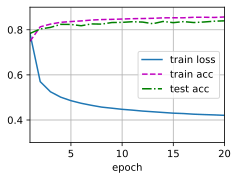

In [8]:
num_epochs = 20

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

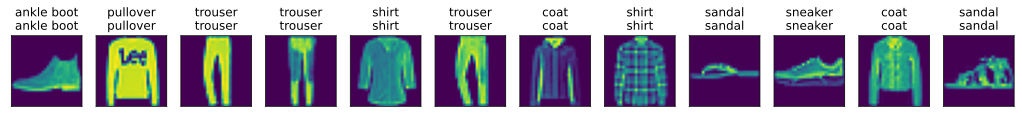

In [15]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break   #表示只选取一个批量
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]    #用zip函数把可迭代对象打包成为一个元组
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)